In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from statsmodels import api as sm

In [2]:
stocks =['FB','AAPL','AMZN','NFLX','GOOG',]
faang_list_df = []
for stock in stocks:
  returns = yf.Ticker(stock)
  returns = returns.history(period="1y")
  returns['returns'] =  returns['Close'].pct_change()

  returns.rename(columns={'returns': stock}, inplace=True)
  returns = returns[stock]
  faang_list_df.append(returns)

faang_all_returns_df =pd.DataFrame(faang_list_df).T
faang_all_returns_df.head()

,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2021-01-15,NaN,NaN,NaN,NaN,NaN
2021-01-19,0.038749,0.005427,0.005319,0.007611,0.031489
2021-01-20,0.024435,0.032856,0.045700,0.168543,0.053628
2021-01-21,0.020151,0.036658,0.013363,-0.011086,0.002305
2021-01-22,0.005974,0.016074,-0.004463,-0.025300,0.005182


In [3]:
print(faang_all_returns_df.describe())

               FB        AAPL        AMZN        NFLX        GOOG
count  252.000000  252.000000  252.000000  252.000000  252.000000
mean     0.001273    0.001370    0.000289    0.000413    0.002005
std      0.018448    0.015565    0.015211    0.020161    0.015078
min     -0.050515   -0.041674   -0.075649   -0.074003   -0.046830
25%     -0.010332   -0.007464   -0.008535   -0.009171   -0.005070
50%      0.000088    0.001442    0.000251    0.001181    0.002299
75%      0.014078    0.012128    0.009876    0.010328    0.009035
max      0.072973    0.053851    0.046927    0.168543    0.073961


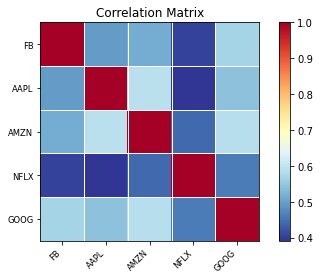

In [4]:
#calculate correlation
correlation_df = faang_all_returns_df.corr()
#plot correlation
sm.graphics.plot_corr(correlation_df,xnames=list(correlation_df.columns))
plt.show()

<Figure size 432x288 with 0 Axes>

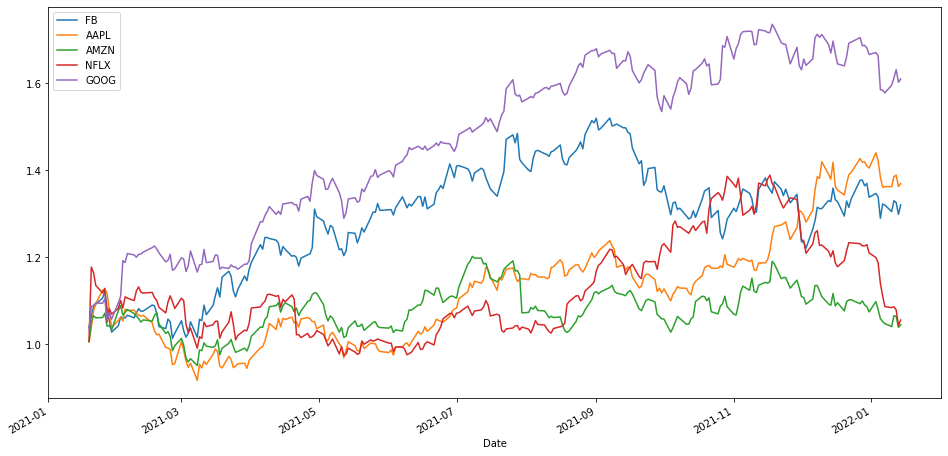

In [5]:
fig = plt.figure()
(faang_all_returns_df + 1).cumprod().plot(figsize=(16, 8))
plt.show()